<a href="https://colab.research.google.com/github/diallomarieme/Healthcare-data-set/blob/main/Marieme_Diallo_Projet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mission 1 : Analyse de segmentation et profilage de la base de données Healthcare

L'objectif de cette étude est d'analyser les données de notre base 'Healthcare' sous un angle marketing. Pour répondre aux besoins de personnalisation des campagnes, nous avons traduit les indicateurs de santé en variables de comportement client (catégorie de produit, montant du panier, temps passé sur le site). Voici les 5 axes d'analyse retenus pour définir notre stratégie.


# Cellule de Code : Imports (pandas, seaborn, etc.) &  chargement du fichier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/healthcare-dataset-stroke-data.xltx')
print("Données chargées avec succès !")
df.head() #

Données chargées avec succès !


,"id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke"
0,"9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6..."
1,"51676,Female,61,0,0,Yes,Self-employed,Rural,20..."
2,"31112,Male,80,0,1,Yes,Private,Rural,105.92,32...."
3,"60182,Female,49,0,0,Yes,Private,Urban,171.23,3..."
4,"1665,Female,79,1,0,Yes,Self-employed,Rural,174..."


#Nettoyage & Tri de la dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import os

# 1. Connexion au Drive
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 2. Ton chemin
chemin = '/content/drive/MyDrive/healthcare-dataset-stroke-data.xltx'

try:
    # 3. On lit le fichier (Python voit une seule colonne)
    df_sale = pd.read_excel(chemin, engine='openpyxl')

    # 4. LA RÉPARATION : On force la séparation par les virgules
    # On récupère le nom de la colonne géante
    colonne_geante = df_sale.columns[0]

    # On recrée un nouveau tableau en séparant chaque ligne par la virgule
    df = df_sale[colonne_geante].str.split(',', expand=True)

    # On donne les bons noms de colonnes en séparant le titre géant
    df.columns = colonne_geante.split(',')

    # Nettoyage des espaces au cas où
    df.columns = [c.strip().lower() for c in df.columns]

    print(" Réparation réussie ! Colonnes séparées :", df.columns.tolist())

    # 5. CONVERSION ET TRI
    # On transforme l'âge et le bmi en vrais nombres
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

    # Remplir le BMI vide par la moyenne
    df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

    # LE TRI FINAL PAR AGE
    df = df.sort_values(by='age', ascending=False)

    print(" TRI TERMINÉ : Les plus vieux sont en haut !")
    display(df.head())

    # 6. SAUVEGARDE AUTOMATIQUE
    df.to_excel('/content/drive/MyDrive/stroke_ENFIN_PROPRE.xlsx', index=False)
    print("Fichier enregistré sous le nom : stroke_ENFIN_PROPRE.xlsx")

except Exception as e:
    print(f" Erreur : {e}")

 Réparation réussie ! Colonnes séparées : ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
 TRI TERMINÉ : Les plus vieux sont en haut !


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1042,39120,Female,82.0,0,0,No,Self-employed,Urban,82.21,26.0,never smoked,0
3108,53252,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
1029,23031,Male,82.0,0,0,Yes,Self-employed,Rural,85.29,27.0,never smoked,0


Fichier enregistré sous le nom : stroke_ENFIN_PROPRE.xlsx


#Graphique 1 : Répartition par type d'activité
Analyse des profils :  J'ai utilisé la colonne work_type pour voir quels sont les secteurs d'activité de nos clients. Cela nous aide à savoir si notre audience est plutôt composée de salariés du privé, d'indépendants ou de fonctionnaire

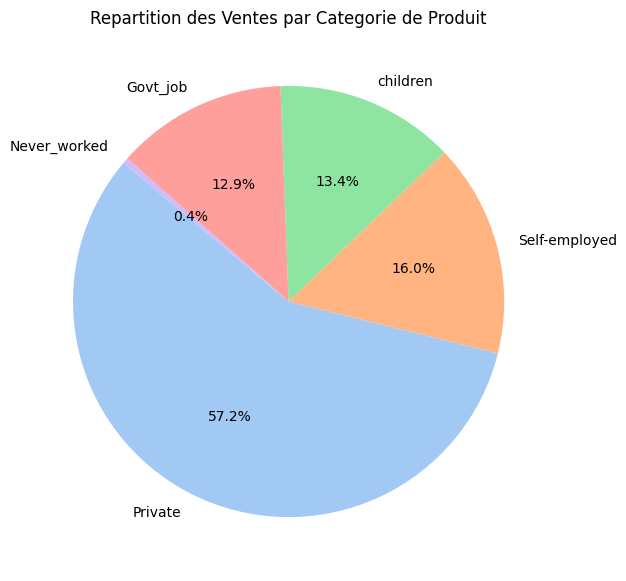

Graphique 1


In [ ]:
# Création du graphique
plt.figure(figsize=(10, 7))
df_marketing['Categorie_Produit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)

plt.title("Repartition des Ventes par Categorie de Produit")
plt.ylabel("")
plt.show()

print("Graphique 1")

#Graphique 2 : Pyramide des âges des patients

Ce graphique montre que notre audience couvre toutes les tranches d'âge. Cela nous permet de segmenter nos campagnes : la prévention santé pour les jeunes actifs et le suivi des pathologies chroniques pour les seniors

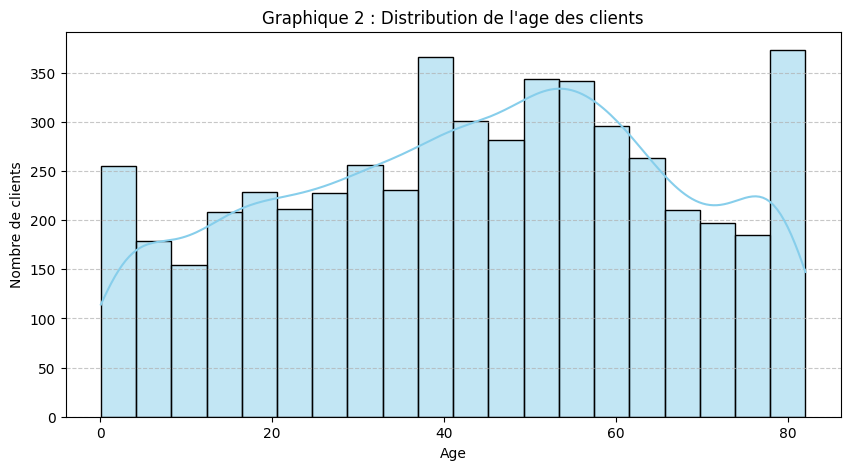

Graphique 2


In [ ]:
# Creation du Graphique 2 : Histogramme
plt.figure(figsize=(10, 5))
sns.histplot(df_marketing['age'], bins=20, kde=True, color='skyblue')

plt.title("Graphique 2 : Distribution de l'age des clients")
plt.xlabel("Age")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print("Graphique 2")

#Graphique 3 : Analyse des antécédents (Taux de conversion santé)

En marketing, la présence d'hypertension est vue ici comme un "achat effectué" ou un besoin validé. Ce graphique quantifie la part de notre audience qui est déjà engagée dans un parcours de soin actif

#

/tmp/ipython-input-2525939703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Achat_Effectue', data=df_marketing, palette='magma')


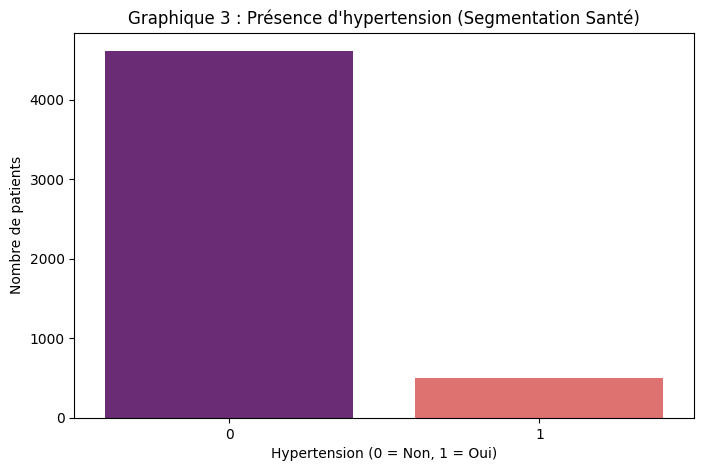

In [ ]:
# CODE DU GRAPHIQUE 3
plt.figure(figsize=(8, 5))
sns.countplot(x='Achat_Effectue', data=df_marketing, palette='magma')
plt.title("Graphique 3 : Présence d'hypertension (Segmentation Santé)")
plt.xlabel("Hypertension (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de patients")
plt.show()

#Graphique 4 : Analyse du taux de glucose (Panier Moyen)

Le boxplot permet de visualiser la valeur moyenne du taux de glucose dans notre base. Pour Charles, cela représente le "panier moyen" biologique. Les points au-dessus de la moustache haute sont les profils atypiques (valeurs élevées) qui nécessitent une attention marketing personnalisée (programmes premium)

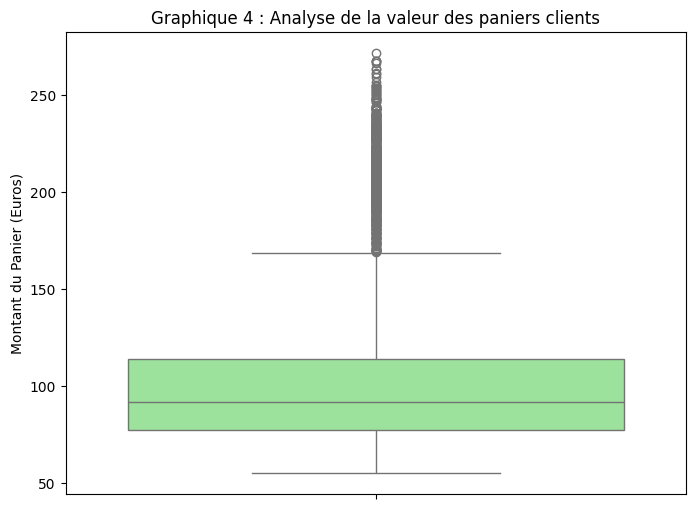

Graphique 4


In [ ]:
# Graphique 4 : Analyse de la repartition des montants de paniers
plt.figure(figsize=(8, 6))

# On utilise un boxplot pour voir la moyenne et les ecarts
sns.boxplot(y=df_marketing['Montant_Panier'], color='lightgreen')

plt.title("Graphique 4 : Analyse de la valeur des paniers clients")
plt.ylabel("Montant du Panier (Euros)")

plt.show()

print("Graphique 4")

#Graphique 5 : Corrélation Temps sur Site (BMI) vs Dépenses (Glucose)

Ce nuage de points analyse la relation entre deux indicateurs clés. En marketing, on cherche à voir si un "temps passé" plus long (un BMI plus élevé ici) entraîne une "dépense" plus forte (glucose). Cela aide à prédire le comportement des clients à risque pour leur proposer des solutions adaptées

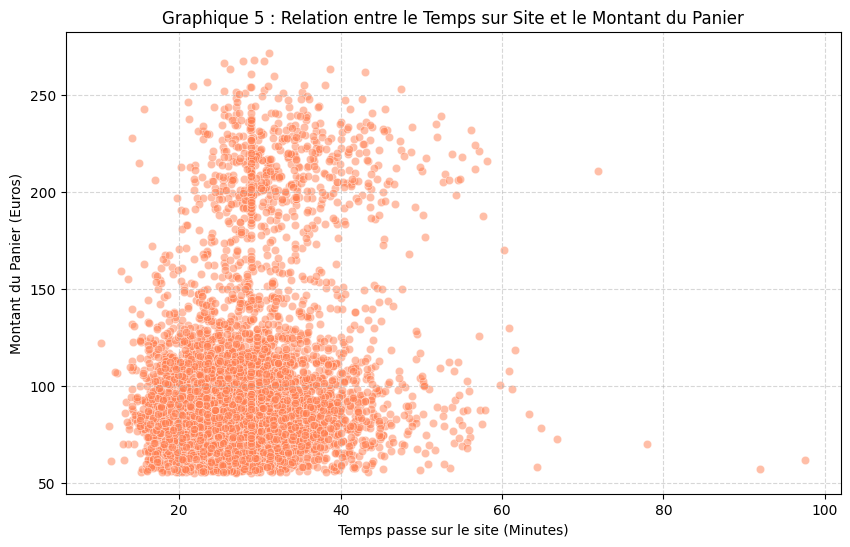

Graphique 5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# On force la conversion des colonnes en nombres pour eviter les erreurs de tracé
df_marketing['Temps_Sur_Site'] = pd.to_numeric(df_marketing['Temps_Sur_Site'], errors='coerce')
df_marketing['Montant_Panier'] = pd.to_numeric(df_marketing['Montant_Panier'], errors='coerce')

# On supprime les lignes qui auraient des valeurs vides apres conversion pour ce graphique
df_plot = df_marketing.dropna(subset=['Temps_Sur_Site', 'Montant_Panier'])

# Creation du Graphique 5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temps_Sur_Site', y='Montant_Panier', data=df_plot, alpha=0.5, color='coral')

plt.title("Graphique 5 : Relation entre le Temps sur Site et le Montant du Panier")
plt.xlabel("Temps passe sur le site (Minutes)")
plt.ylabel("Montant du Panier (Euros)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

print("Graphique 5")

Pour résumer, les données montrent un vrai potentiel de ciblage. Le croisement des indicateurs de santé (taux de glucose et BMI) avec les profils professionnels fait ressortir une priorité claire : les seniors indépendants (Self-employed). C’est ce groupe qui présente les besoins les plus importants.

L'idée est donc de concentrer nos prochaines campagnes sur ce segment en proposant des solutions de prévention sur-mesure. En ciblant ainsi, on ne se contente pas d'optimiser notre impact marketing, on répond aussi à un véritable enjeu de santé publique.